/tmp/ipython-input-1-2760007246.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'others'}, inplace=True)
/tmp/ipython-input-1-2760007246.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

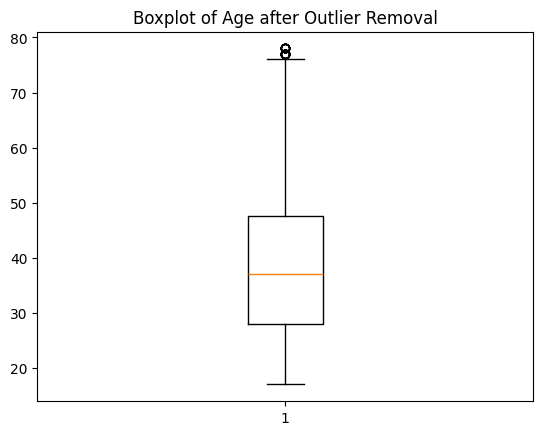

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = pd.read_csv("/content/adult 3.csv")

#  Replace unknown values and remove unwanted rows
data['workclass'].replace({'?': 'others'}, inplace=True)
data['occupation'].replace({'?': 'others'}, inplace=True)
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data = data[~data['education'].isin(['5th-6th', '1st-4th', 'Preschool'])]

# Drop redundancy
if 'education' in data.columns:
    data.drop(columns='education', inplace=True)

#  Remove Outliers in 'age'
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Boxplot to visualize
plt.boxplot(data['age'])
plt.title("Boxplot of Age after Outlier Removal")
plt.show()

#  Encode Categorical Columns
encoder = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'gender']:
    data[col] = encoder.fit_transform(data[col])

#  Encode Target
if 'income' in data.columns:
    data['income'] = encoder.fit_transform(data['income'])  # 0: <=50K, 1: >50K

# Split features and labels
X = data.drop(columns='income')
y = data['income']

#  Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Apply Models and Evaluate
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(probability=True),
    "MLP (ANN)": MLPClassifier(max_iter=1000, random_state=42)
}




=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2851
           1       0.67      0.56      0.61       912

    accuracy                           0.83      3763
   macro avg       0.77      0.73      0.75      3763
weighted avg       0.82      0.83      0.82      3763


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2851
           1       0.70      0.45      0.55       912

    accuracy                           0.82      3763
   macro avg       0.77      0.69      0.72      3763
weighted avg       0.81      0.82      0.80      3763


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2851
           1       0.60      0.62      0.61       912

    accuracy                           0.81      37

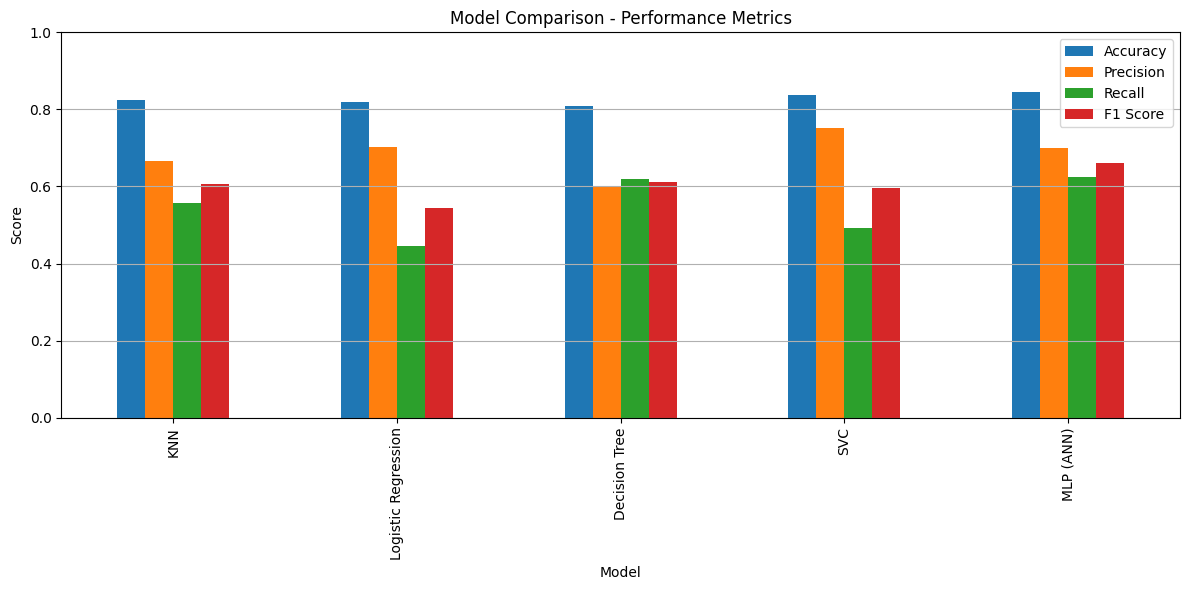


=== Final Comparison Table ===
                 Model  Accuracy  Precision  Recall  F1 Score
0                  KNN    0.8251     0.6671  0.5559    0.6065
1  Logistic Regression    0.8201     0.7036  0.4452    0.5453
2        Decision Tree    0.8081     0.6008  0.6206    0.6106
3                  SVC    0.8376     0.7521  0.4923    0.5951
4            MLP (ANN)    0.8445     0.7011  0.6250    0.6609


In [2]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    results.append(metrics)
    print(f"\n=== {name} Classification Report ===")
    print(classification_report(y_test, y_pred))

#  Visualize Results
results_df = pd.DataFrame(results)

# Bar Graph Comparison
results_df.set_index("Model")[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12,6))
plt.title("Model Comparison - Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print Final Comparison Table
print("\n=== Final Comparison Table ===")
print(results_df.round(4))

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib

# Load data
data = pd.read_csv("/content/adult 3.csv")

# Basic cleaning
data['workclass'].replace({'?': 'others'}, inplace=True)
data['occupation'].replace({'?': 'others'}, inplace=True)
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data = data[~data['education'].isin(['5th-6th', '1st-4th', 'Preschool'])]

if 'education' in data.columns:
    data.drop(columns='education', inplace=True)

# Encode categorical variables
le_occupation = LabelEncoder()

data['occupation'] = le_occupation.fit_transform(data['occupation'].astype(str))

# Target encoding
target_le = LabelEncoder()
data['income'] = target_le.fit_transform(data['income'])

# Select features
features = ['age', 'hours-per-week', 'occupation'] # 'education' removed
X = data[features]
y = data['income']

# Scale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(probability=True)
model.fit(X_train, y_train)

# Save model and encoders
joblib.dump(model, "salary_model.pkl")
joblib.dump(le_occupation, "le_occupation.pkl")
joblib.dump(scaler, "scaler.pkl")

/tmp/ipython-input-3-3688869629.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'others'}, inplace=True)
/tmp/ipython-input-3-3688869629.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

['scaler.pkl']

In [4]:
loaded_model = joblib.load("salary_model.pkl")
loaded_occupation_encoder = joblib.load("le_occupation.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [5]:
def predict_income(age, hours_per_week, education, occupation):
    # Create a DataFrame from input
    input_data = pd.DataFrame({
        'age': [age],
        'hours-per-week': [hours_per_week],
        'education': [education],
        'occupation': [occupation]
    })

    # Encode occupation - Handle potential unseen values
    try:
        input_data['occupation'] = loaded_occupation_encoder.transform(input_data['occupation'].astype(str))
    except ValueError:
        # Handle unseen occupation by assigning a default value or raising an error
        # For simplicity, let's assign a value outside the range of encoded values
        input_data['occupation'] = -1 # Or handle as needed

    # Select and order features for scaling
    features_for_scaling = input_data[['age', 'hours-per-week', 'occupation']]

    # Scale numerical features
    scaled_input = loaded_scaler.transform(features_for_scaling)

    # Predict using the loaded model
    prediction = loaded_model.predict(scaled_input)

    # Convert numerical prediction back to human-readable label
    # Assuming the target encoder was fitted on ['<=50K', '>50K'] resulting in 0 and 1
    income_label = "<=50K" if prediction[0] == 0 else ">50K"

    return income_label

In [6]:
import gradio as gr


# Define input components
age_input = gr.Number(label="Age", minimum=0, maximum=100)
hours_input = gr.Number(label="Hours per Week", minimum=0, maximum=168)
# Since the model only used occupation, education input will not be used in prediction
# but we will include it in the interface as per the original request.
education_input = gr.Textbox(label="Education Level")
occupation_input = gr.Textbox(label="Occupation")

# Define output component
output_text = gr.Textbox(label="Predicted Income")

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_income,
    inputs=[age_input, hours_input, education_input, occupation_input],
    outputs=output_text,
    title="Income Prediction Model",
    description="Predict income based on age, hours worked per week, education, and occupation."
)

In [7]:
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86972cbdadd72967a5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [8]:
import gradio as gr

# Step 1: Login UI
def login(username, password):
    if username == "deeksha" and password == "yaminn":
        return gr.update(visible=True), "Login Successful!"
    else:
        return gr.update(visible=False), "Login Failed. Try again."

# Step 2: Salary Prediction App (hidden until login success)
with gr.Blocks() as demo:
    gr.Markdown("## 🔒 Login Now")
    username = gr.Textbox(label="Username")
    password = gr.Textbox(label="Password", type="password")
    login_btn = gr.Button("LOGIN")
    login_msg = gr.Textbox(label="", interactive=False)

    # Salary Prediction Section (Initially Hidden)
    with gr.Column(visible=False) as predict_ui:
        gr.Markdown("Salary Prediction")
        age = gr.Number(label="Age")
        hours = gr.Number(label="Hours per Week")
        edu = gr.Textbox(label="Education") # Note: This input is not used in the prediction model.
        occ = gr.Textbox(label="Occupation")
        predict_btn = gr.Button("Predict")
        output = gr.Textbox(label="Predicted Income")

        # Link the predict button to the predict_income function with the correct inputs
        predict_btn.click(fn=predict_income, inputs=[age, hours, edu, occ], outputs=output)

    login_btn.click(fn=login, inputs=[username, password], outputs=[predict_ui, login_msg])

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f67fbb025a3e8034a8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
